In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('merged_data_datetime_2025.csv')
data['DateTime'] = pd.to_datetime(data['DateTime'])
data = data[data["Category"] != "OTHER OFFENSES"]
crimes = data["Category"].unique().tolist()

In [ ]:
import pandas as pd
import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.palettes import Turbo256, Spectral11, Set3, Dark2, Category10
from bokeh.models import ColumnDataSource, Title

crime_data = data[(data["Year"] >= 2017) & (data["Year"] <= 2024)]
crime_data = pd.crosstab(
    index=crime_data["Year"],  
    columns=crime_data["Category"]
)

crime_data = crime_data.astype(float)

base_year = 2017
base_values = crime_data.loc[base_year]

for column in crime_data.columns:
    if base_values[column] > 0:
        crime_data[column] = (crime_data[column] / base_values[column]) * 100

crime_data = crime_data[crime_data.index >= 2018]

crime_data_reset = crime_data.reset_index()
crime_data_reset['Year'] = crime_data_reset['Year'].astype(str)

years = [str(year) for year in range(2018, 2025)]
source = ColumnDataSource(crime_data_reset)

p = figure(
    x_range=years, 
    title="Relative Growth of Crime Categories (2017-2024)", 
    width=700, 
    height=500, 
    tools=["save", "reset", "hover"], 
    active_drag=None, 
    active_scroll=None
)

custom_palette = []
custom_palette.extend(Category10[10])  
custom_palette.extend(Dark2[8])        
custom_palette.extend(Set3[12])        
custom_palette.extend(Spectral11)      

top_crimes = data[(data["Year"] >= 2018) & (data["Year"] <= 2024)]["Category"].value_counts().nlargest(10).index.tolist()
crimes = [crime for crime in top_crimes if crime in crime_data.columns]

bar = {}
for i, crime in enumerate(crimes):
    if i < len(custom_palette):
        bar[crime] = p.vbar(
            x='Year', 
            top=crime, 
            source=source, 
            width=0.8, 
            legend_label=crime, 
            color=custom_palette[i],
            alpha=0.5
        )

p.legend.location = "center_right"
p.legend.click_policy = "hide"
p.add_layout(p.legend[0], 'right')
p.legend.label_text_font_size = "8pt"
p.legend.spacing = 1

p.xaxis.axis_label = "Reporting Year"
p.yaxis.axis_label = "Growth Index (2017 Baseline = 100%)"
p.y_range.start = 0

description = """
This visualization shows the relative growth of different crime categories compared to 2017 levels.
Each crime category is indexed to its 2017 count (set to 100%), allowing for comparison of growth rates
regardless of absolute volume. Values above 100% indicate an increase from 2017 levels, while values
below 100% represent a decrease. 
"""

p.add_layout(Title(text=description, text_font_size="10pt", text_font_style="italic"), "below")
output_file("assets/crime_growth.html")
output_notebook()
show(p)

Loading BokehJS ...

C:\Users\musti\AppData\Local\Temp\ipykernel_41808\4253918804.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs_data["date"] = drugs_data["DateTime"].dt.date
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfo

37.5


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

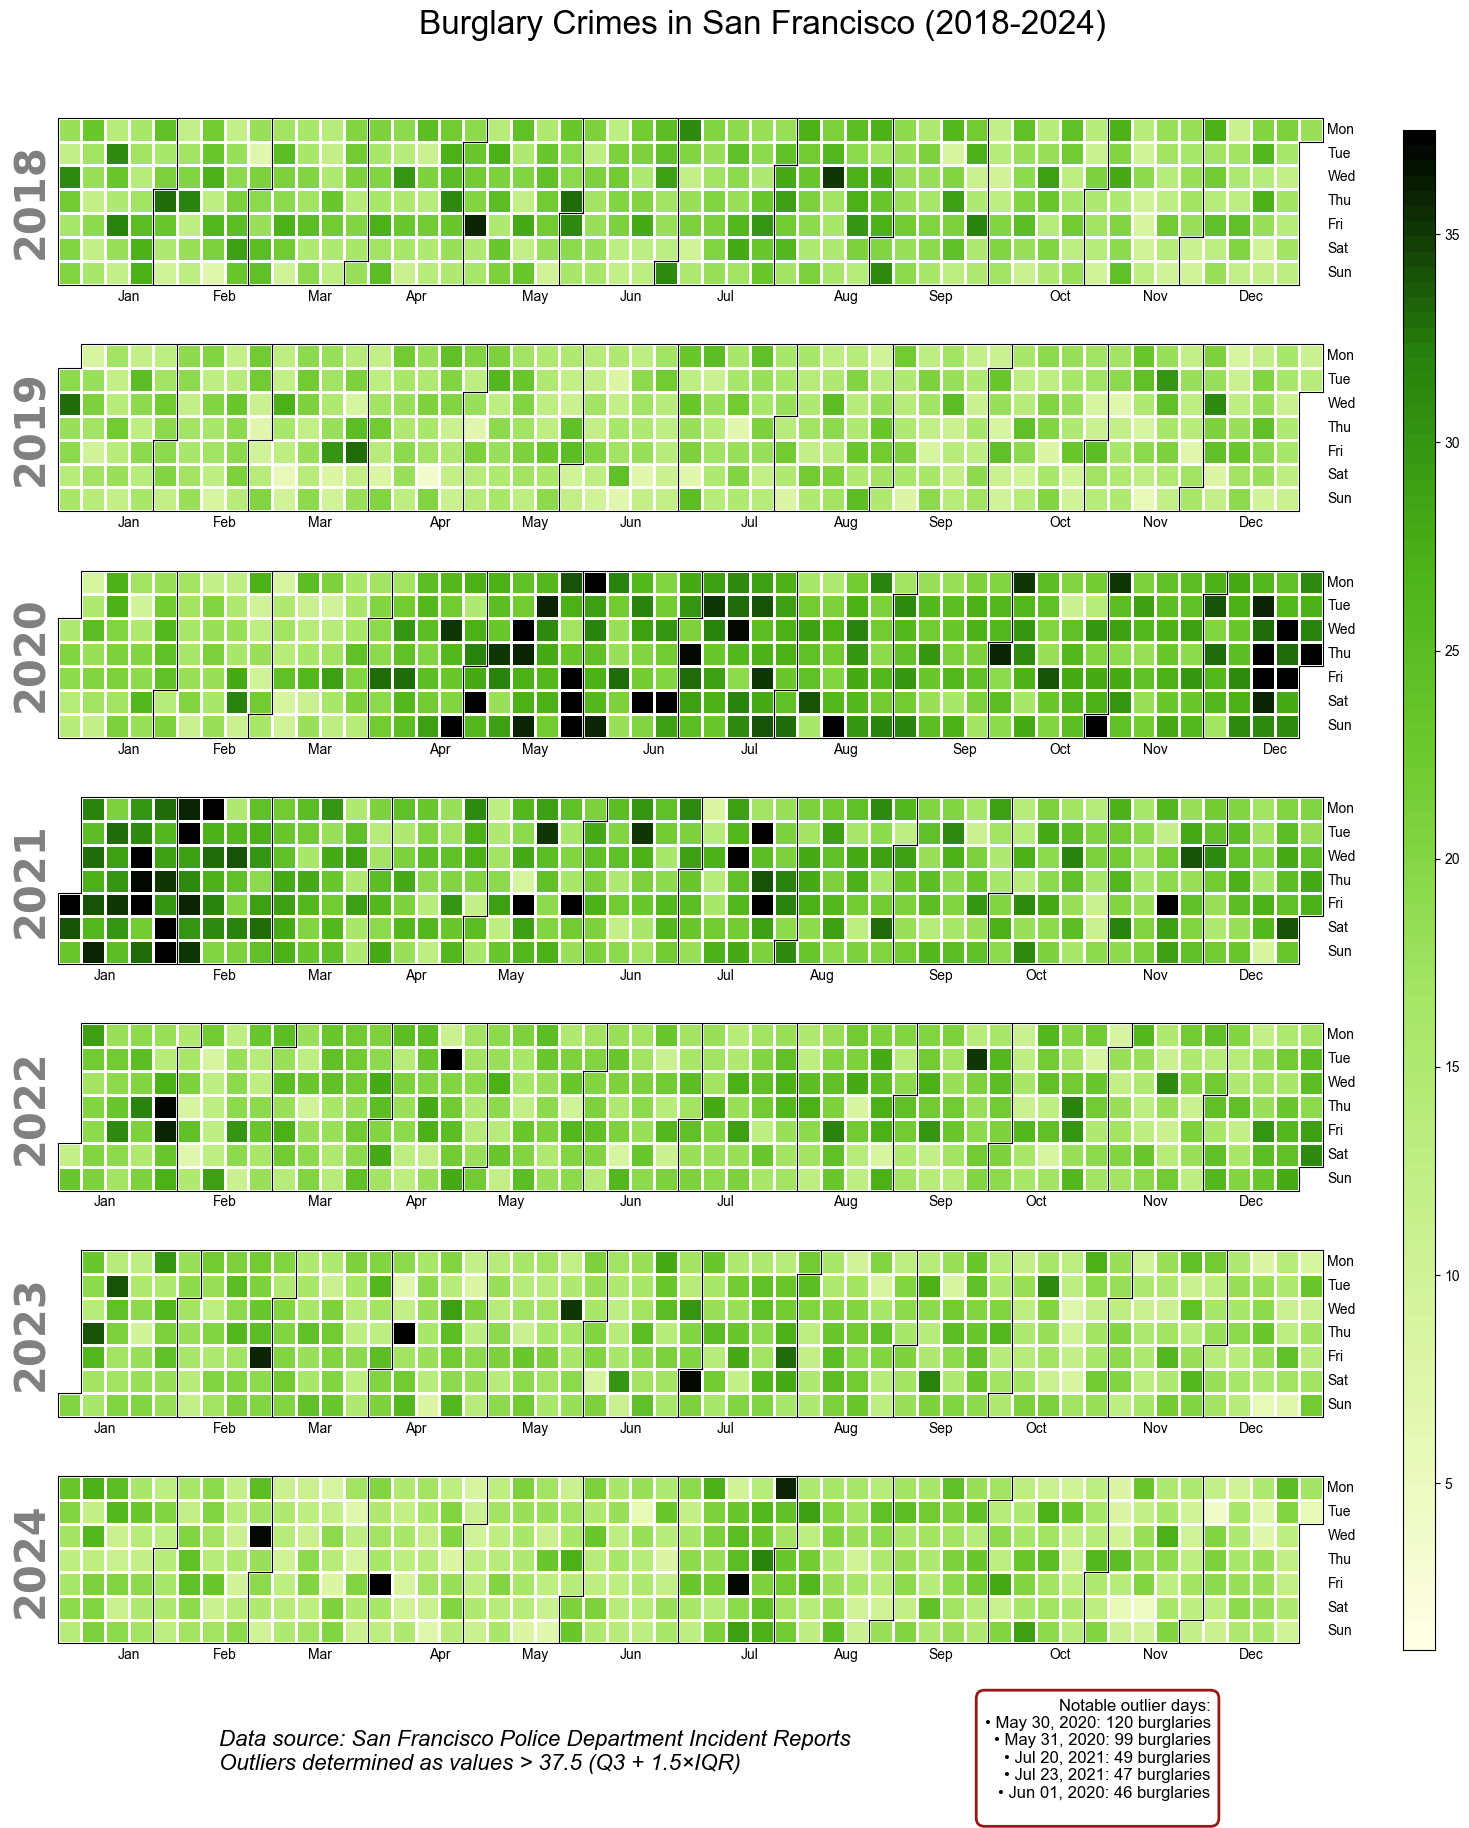

In [79]:
#Cal plot
import matplotlib.pyplot as plt
import calplot
from matplotlib.colors import LinearSegmentedColormap


drugs_data = data[((data["Category"] == "BURGLARY") )& 
                  (data["Year"] >= 2018)& (data["Year"] <= 2024)]
drugs_data["date"] = drugs_data["DateTime"].dt.date
events = pd.Series(drugs_data.groupby("date").size().values, 
                  index=pd.to_datetime(drugs_data.groupby("date").size().index))

q75 = events.quantile(0.75)
q25 = events.quantile(0.25)
iqr = q75 - q25
upper_bound = q75 + 1.5 * iqr

events_capped = events.copy()
outlier_days = events[events > upper_bound]

colors_normal = [
    (1.00, 1.00, 0.90),  
    (0.90, 0.97, 0.70),  
    (0.78, 0.94, 0.55),  
    (0.65, 0.90, 0.40),  
    (0.45, 0.80, 0.20),  
    (0.30, 0.70, 0.10),  
    (0.15, 0.50, 0.05),  
    (0.00, 0.00, 0.00),   
]
cmap_normal = LinearSegmentedColormap.from_list("custom_YlGn", colors_normal, N=100)


fig, axes = calplot.calplot(
    events,  # Use the original events data
    figsize=(16, 16),
    cmap=cmap_normal,
    daylabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
    dayticks=True,
    linewidth=0.8,
    colorbar=True,
    tight_layout=True,
    edgecolor='black',
    fillcolor='#F8F8F8',
    how='sum',
    vmin=1,
    vmax=upper_bound
)
print(upper_bound)

plt.suptitle("Burglary Crimes in San Francisco (2018-2024)", 
             fontsize=24, y =1.05,x=0.45)

outlier_text = ""
if len(outlier_days) > 0:
    outlier_days_sorted = outlier_days.sort_values(ascending=False)
    top_outliers = outlier_days_sorted.head(5)    
    outlier_text = "Notable outlier days:\n"
    for date, value in top_outliers.items():
        outlier_text += f"• {date.strftime('%b %d, %Y')}: {int(value)} burglaries\n"
    plt.figtext(0.73, -0.08, outlier_text, 
                fontsize=12, 
                bbox=dict(facecolor='white', alpha=0.9, boxstyle='round,pad=0.5', 
                         edgecolor='darkred', linewidth=2),
                verticalalignment='bottom', horizontalalignment='right')
    
text_under =f"Data source: San Francisco Police Department Incident Reports\nOutliers determined as values > {upper_bound:.1f} (Q3 + 1.5×IQR)" 
plt.figtext(0.11, -0.05, text_under,
            fontsize=16, style='italic')
plt.savefig('assets/burglary_calendar.png', dpi=300, bbox_inches='tight')

In [9]:
import folium
from folium.plugins import HeatMapWithTime
df_burglary = data[(data['Category'] == 'BURGLARY')&(data['Year'] >=2018)&(data['Year'] <=2024)].copy()
df_burglary = df_burglary[['Latitude', 'Longitude', 'DateTime',"Year"]].dropna()

heat_data_by_year = []
years = sorted(df_burglary['Year'].unique())
years_str = [str(year) for year in years]  

for year in years:
    year_data = df_burglary[df_burglary['Year'] == year]
    locations = year_data[['Latitude', 'Longitude']].values.tolist()
    heat_data_by_year.append(locations)

avg_lat = df_burglary['Latitude'].mean() if not df_burglary.empty else 37.7749
avg_lon = df_burglary['Longitude'].mean() if not df_burglary.empty else -122.4194
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12, tiles='CartoDB positron')

try:
    HeatMapWithTime(
        heat_data_by_year,
        index=years_str,  
        auto_play=False,
        max_opacity=0.5,
        radius=7,
        name='Burglary Locations Over Time',
    ).add_to(m)
except Exception as e:
    folium.Marker(
        [avg_lat, avg_lon],
        popup=f"Error creating heatmap: {str(e)}",
        icon=folium.Icon(color="red")
    ).add_to(m)
    print(f"Error creating heatmap: {str(e)}")
html_file_path = "assets/burglary_heatmap.html"
m.save(html_file_path)

m